In [1]:
import pandas as pd
import csv
import numpy as np
import category_encoders as ce
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sklearn
import time
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

#Base que sera usada na classificação
dataset = pd.read_csv('base_caract.csv', sep=',')
#Base que mantera todas as colunas para fazer as analises
dataset_aux = pd.read_csv('base_caract.csv', sep=',')

#passanda idades no mesmo intervalo para um inteiro
for indice, linha in dataset.iterrows():

    if linha['idade'] >= 23 and linha['idade'] <= 28:
        linha['idade'] = 1
    elif linha['idade'] >= 29 and linha['idade'] <= 34:
        linha['idade'] = 2
    elif linha['idade'] >= 35 and linha['idade'] <= 40:
        linha['idade'] = 3
    elif linha['idade'] >= 41 and linha['idade'] <= 46:
        linha['idade'] = 4
    elif linha['idade'] >= 47 and linha['idade'] <= 52:
        linha['idade'] = 5
    elif linha['idade'] >= 53 and linha['idade'] <= 58:
        linha['idade'] = 6
    elif linha['idade'] >= 59 and linha['idade'] <= 64:
        linha['idade'] = 7
    elif linha['idade'] >= 65 and linha['idade'] <= 70:
        linha['idade'] = 8
    elif linha['idade'] >= 71 and linha['idade'] <= 78:
        linha['idade'] = 9
    dataset.loc[indice, 'idade'] = int(linha['idade'])

#codificando os codigos dos estados
data = dataset['co_uf_ies']
encoder_ies=ce.OneHotEncoder(cols=['co_uf_ies'])
classes = encoder_ies.fit_transform(data).values

dataset.pop('co_uf_ies')
dist = dataset.pop('dist')
idh_uf_ies = dataset.pop('idh_uf_ies')

co_uf_nasc = dataset['co_uf_nasc']
encoder=ce.OneHotEncoder(cols=['co_uf_nasc'])
dataset = encoder.fit_transform(dataset).values

X_train, X_test, y_train, y_test = train_test_split(dataset, classes, test_size=0.20, random_state=42)

# Convertendo rótulos para formato adequado
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.flatten())
y_test_encoded = label_encoder.transform(y_test.flatten())

# Convertendo os dados para tensores
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train_encoded, dtype=tf.int32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test_encoded, dtype=tf.int32)

# Construindo o modelo da rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),  # Camada oculta adicional 1
    tf.keras.layers.Dense(256, activation='relu'),  # Camada oculta adicional 2
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compilando o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo
start_time = time.time()
model.fit(X_train_tensor, y_train_tensor, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Avaliando o desempenho no conjunto de teste
y_pred_probs = model.predict(X_test_tensor)
y_pred = tf.argmax(y_pred_probs, axis=1).numpy()  # Convertendo para array NumPy


accuracy = accuracy_score(y_test_encoded[:y_pred.shape[0]], y_pred)
precision = precision_score(y_test_encoded[:y_pred.shape[0]], y_pred, average='weighted')
recall = recall_score(y_test_encoded[:y_pred.shape[0]], y_pred, average='weighted')
f1 = f1_score(y_test_encoded[:y_pred.shape[0]], y_pred, average='weighted')
end_time = time.time() - start_time

print('Acurácia Rede Neural TensorFlow: {:.2f}%'.format(accuracy * 100))
print('Precisão Rede Neural TensorFlow: {:.2f}%'.format(precision*100))
print('Recall Rede Neural TensorFlow: {:.2f}%'.format(recall*100))
print('F1-Score Rede Neural TensorFlow: {:.2f}%'.format(f1*100))
print('Tempo execução Rede Neural TensorFlow: {:.2f} segundos'.format(end_time))

import time
print("Iniciando...")
model_net = MLPClassifier(activation='relu', solver='adam', alpha=0.5, learning_rate='constant', max_iter=500)
model_rand = RandomForestClassifier(n_estimators=200, max_depth=30)
models = [model_net, model_rand]
name = ['Rede Neural Perceptron', 'Random Forest']
count = 0
models_result = {}
models_result['Rede Neural TensorFlow'] =  []
models_result['Rede Neural TensorFlow'].append(accuracy * 100)
models_result['Rede Neural TensorFlow'].append(precision*100)
models_result['Rede Neural TensorFlow'].append(recall*100)
models_result['Rede Neural TensorFlow'].append(f1*100)
models_result['Rede Neural TensorFlow'].append(end_time)
for item in models:
    inicio = time.time() #Para calculo do tempo de execuçao
    models_result[name[count]] = []
    print(item.fit(X_train, y_train))
    predictions = item.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    print('Acurácia {}: {:.2f}%'.format(name[count], accuracy * 100))
    print('Precisão {}: {:.2f}%'.format(name[count], precision*100))
    print('Recall {}: {:.2f}%'.format(name[count], recall*100))
    print('F1-Score {}: {:.2f}%'.format(name[count], f1*100))
    
    models_result[name[count]].append(accuracy*100)
    models_result[name[count]].append(precision*100)
    models_result[name[count]].append(recall*100)
    models_result[name[count]].append(f1*100)
    tempo = time.time() - inicio #Armazena o tempo gasto
    models_result[name[count]].append(tempo)
    print('Tempo execução {}: {:.2f} segundos \n'.format(name[count], tempo))
    count +=1


2023-12-10 18:54:55.478295: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-10 18:54:55.528903: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-10 18:54:55.529618: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-10 18:54:56.823314: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/10
2444/2444 - 5s - loss: 0.3553 - accuracy: 0.9594 - val_loss: 0.1590 - val_accuracy: 0.9630 - 5s/epoch - 2ms/step
Epoch 2/10
2444/2444 - 5s - loss: 0.1639 - accuracy: 0.9630 - val_loss: 0.1585 - val_accuracy: 0.9630 - 5s/epoch - 2ms/step
Epoch 3/10
2444/2444 - 3s - loss: 0.1617 - accuracy: 0.9630 - val_loss: 0.1589 - val_accuracy: 0.9630 - 3s/epoch - 1ms/step
Epoch 4/10
2444/2444 - 3s - loss: 0.1597 - accuracy: 0.9630 - val_loss: 0.1584 - val_accuracy: 0.9630 - 3s/epoch - 1ms/step
Epoch 5/10
2444/2444 - 4s - loss: 0.1592 - accuracy: 0.9630 - val_loss: 0.1585 - val_accuracy: 0.9630 - 4s/epoch - 2ms/step
Epoch 6/10
2444/2444 - 4s - loss: 0.1589 - accuracy: 0.9630 - val_loss: 0.1612 - val_accuracy: 0.9630 - 4s/epoch - 1ms/step
Epoch 7/10
2444/2444 - 4s - loss: 0.1592 - accuracy: 0.9630 - val_loss: 0.1588 - val_accuracy: 0.9630 - 4s/epoch - 2ms/step
Epoch 8/10
2444/2444 - 3s - loss: 0.1588 - accuracy: 0.9630 - val_loss: 0.1595 - val_accuracy: 0.9630 - 3s/epoch - 1ms/step
Epoch 9/

/home/fundecc/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acurácia Rede Neural TensorFlow: 96.30%
Precisão Rede Neural TensorFlow: 92.73%
Recall Rede Neural TensorFlow: 96.30%
F1-Score Rede Neural TensorFlow: 94.48%
Tempo execução Rede Neural TensorFlow: 38.78 segundos
Iniciando...
MLPClassifier(alpha=0.5, max_iter=500)


/home/fundecc/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acurácia Rede Neural Perceptron: 59.37%
Precisão Rede Neural Perceptron: 68.68%
Recall Rede Neural Perceptron: 59.37%
F1-Score Rede Neural Perceptron: 61.21%
Tempo execução Rede Neural Perceptron: 228.32 segundos 

RandomForestClassifier(max_depth=30, n_estimators=200)
Acurácia Random Forest: 65.24%
Precisão Random Forest: 73.93%
Recall Random Forest: 65.24%
F1-Score Random Forest: 67.70%
Tempo execução Random Forest: 95.74 segundos 



/home/fundecc/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[96.29599312405354, 92.72918291747766, 96.29599312405354, 94.47893606149711, 38.77857279777527], [59.374616297630254, 68.67746321656779, 59.374616297630254, 61.21413401048205, 228.3159520626068], [65.23963491998526, 73.92553615166084, 65.23963491998526, 67.7031118823085, 95.74165964126587]]


<function matplotlib.pyplot.show(close=None, block=None)>

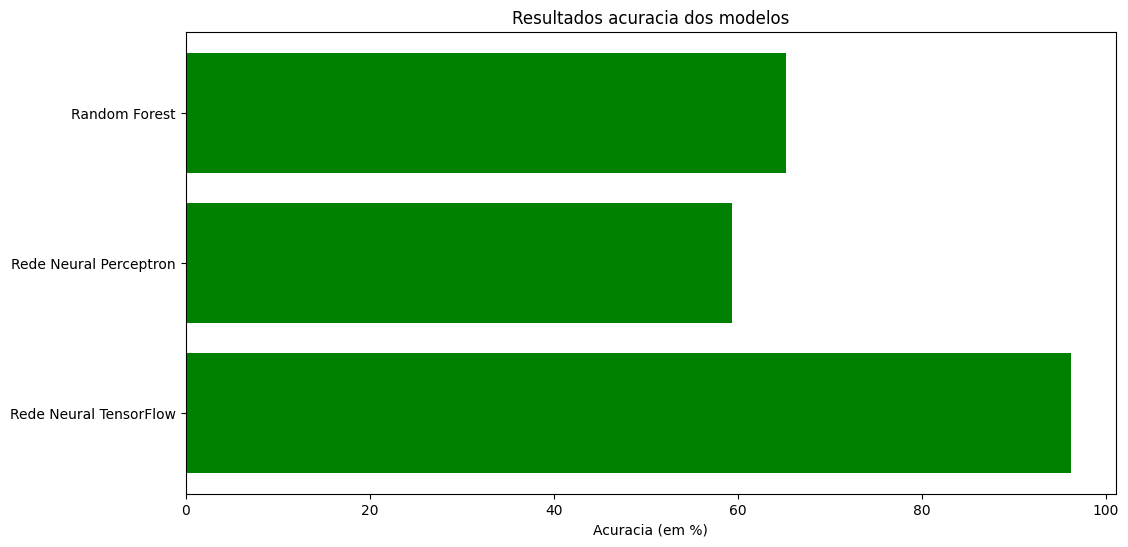

In [2]:
modelos = [i for i in models_result.keys()]
acuracia_taxa = [j for j in models_result.values()]
tam = len(acuracia_taxa)
print(acuracia_taxa)
for k in range (0, tam):
    acuracia_taxa[k] = acuracia_taxa[k][0]
plt.figure(figsize=(12, 6))
plt.barh(modelos, acuracia_taxa, align='center', color='green')
plt.xlabel('Modelos')
plt.xlabel('Acuracia (em %)')
plt.title('Resultados acuracia dos modelos')
plt.show

[[96.29599312405354, 92.72918291747766, 96.29599312405354, 94.47893606149711, 38.77857279777527], [59.374616297630254, 68.67746321656779, 59.374616297630254, 61.21413401048205, 228.3159520626068], [65.23963491998526, 73.92553615166084, 65.23963491998526, 67.7031118823085, 95.74165964126587]]


<function matplotlib.pyplot.show(close=None, block=None)>

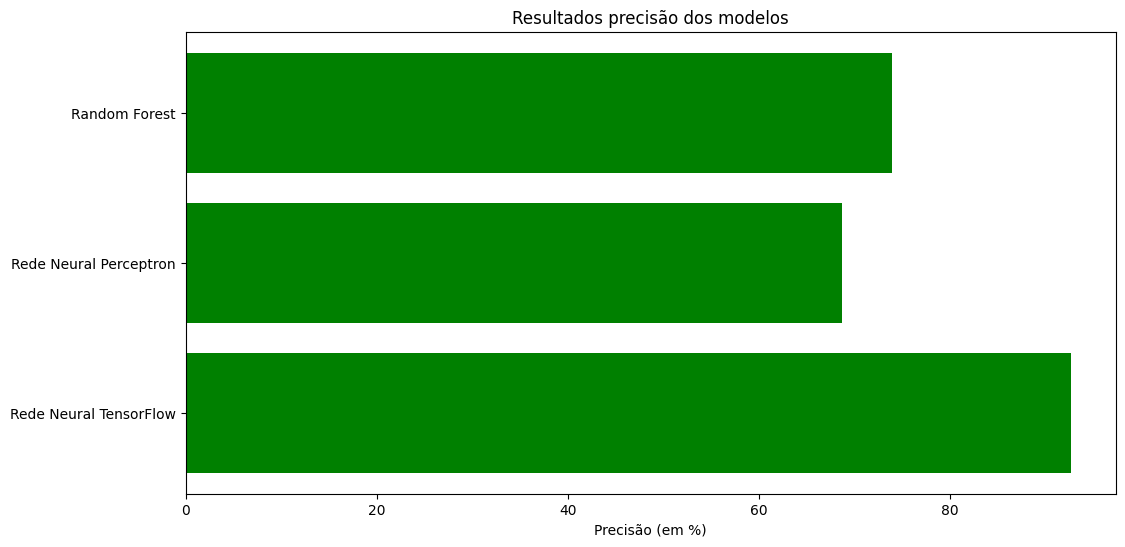

In [3]:
modelos = [i for i in models_result.keys()]
acuracia_taxa = [j for j in models_result.values()]
tam = len(acuracia_taxa)
print(acuracia_taxa)
for k in range (0, tam):
    acuracia_taxa[k] = acuracia_taxa[k][1]
plt.figure(figsize=(12, 6))
plt.barh(modelos, acuracia_taxa, align='center', color='green')
plt.xlabel('Modelos')
plt.xlabel('Precisão (em %)')
plt.title('Resultados precisão dos modelos')
plt.show

[[96.29599312405354, 92.72918291747766, 96.29599312405354, 94.47893606149711, 38.77857279777527], [59.374616297630254, 68.67746321656779, 59.374616297630254, 61.21413401048205, 228.3159520626068], [65.23963491998526, 73.92553615166084, 65.23963491998526, 67.7031118823085, 95.74165964126587]]


<function matplotlib.pyplot.show(close=None, block=None)>

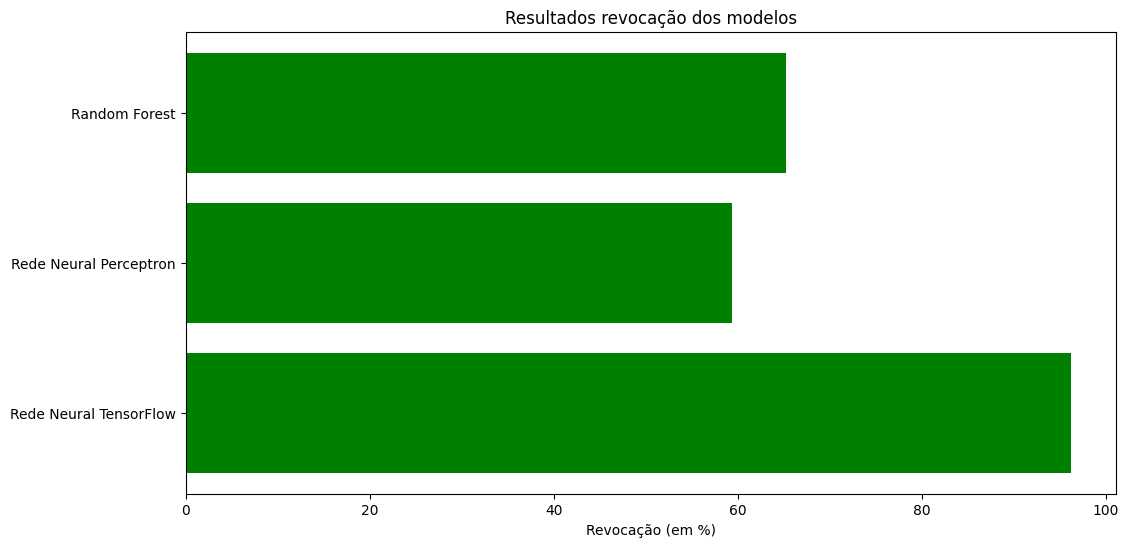

In [4]:
modelos = [i for i in models_result.keys()]
acuracia_taxa = [j for j in models_result.values()]
tam = len(acuracia_taxa)
print(acuracia_taxa)
for k in range (0, tam):
    acuracia_taxa[k] = acuracia_taxa[k][2]
plt.figure(figsize=(12, 6))
plt.barh(modelos, acuracia_taxa, align='center', color='green')
plt.xlabel('Modelos')
plt.xlabel('Revocação (em %)')
plt.title('Resultados revocação dos modelos')
plt.show

[[96.29599312405354, 92.72918291747766, 96.29599312405354, 94.47893606149711, 38.77857279777527], [59.374616297630254, 68.67746321656779, 59.374616297630254, 61.21413401048205, 228.3159520626068], [65.23963491998526, 73.92553615166084, 65.23963491998526, 67.7031118823085, 95.74165964126587]]


<function matplotlib.pyplot.show(close=None, block=None)>

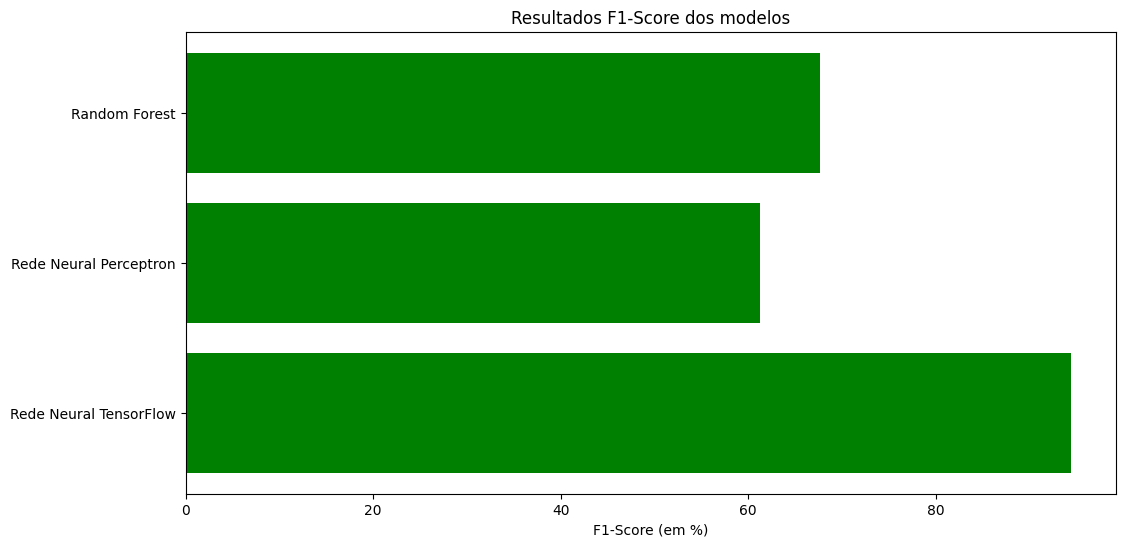

In [5]:
modelos = [i for i in models_result.keys()]
acuracia_taxa = [j for j in models_result.values()]
tam = len(acuracia_taxa)
print(acuracia_taxa)
for k in range (0, tam):
    acuracia_taxa[k] = acuracia_taxa[k][3]
plt.figure(figsize=(12, 6))
plt.barh(modelos, acuracia_taxa, align='center', color='green')
plt.xlabel('Modelos')
plt.xlabel('F1-Score (em %)')
plt.title('Resultados F1-Score dos modelos')
plt.show

[[96.29599312405354, 92.72918291747766, 96.29599312405354, 94.47893606149711, 38.77857279777527], [59.374616297630254, 68.67746321656779, 59.374616297630254, 61.21413401048205, 228.3159520626068], [65.23963491998526, 73.92553615166084, 65.23963491998526, 67.7031118823085, 95.74165964126587]]


<function matplotlib.pyplot.show(close=None, block=None)>

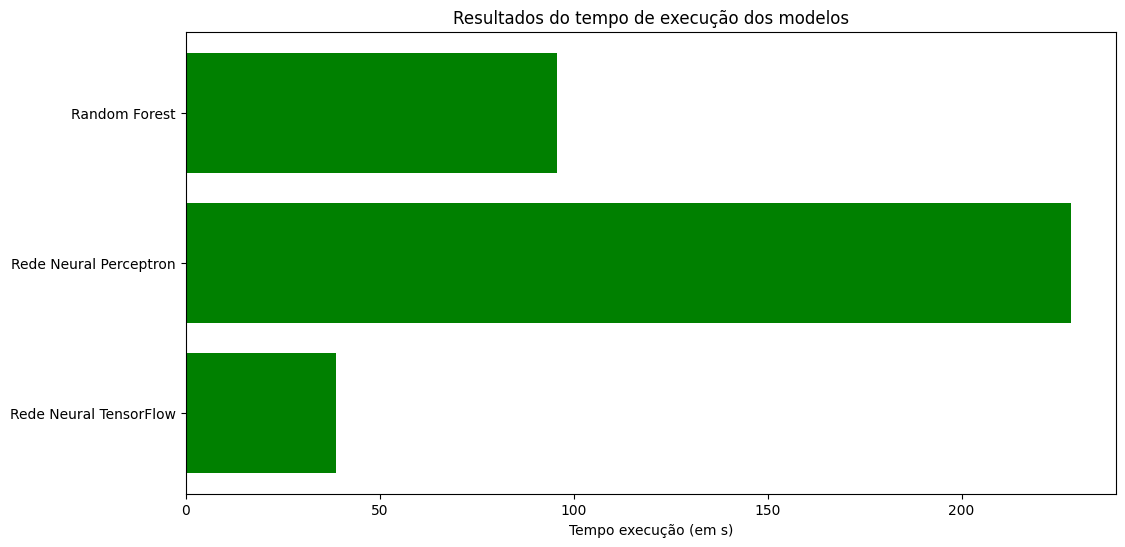

In [6]:
modelos = [i for i in models_result.keys()]
acuracia_taxa = [j for j in models_result.values()]
tam = len(acuracia_taxa)
print(acuracia_taxa)
for k in range (0, tam):
    acuracia_taxa[k] = acuracia_taxa[k][4]
plt.figure(figsize=(12, 6))
plt.barh(modelos, acuracia_taxa, align='center', color='green')
plt.xlabel('Modelos')
plt.xlabel('Tempo execução (em s)')
plt.title('Resultados do tempo de execução dos modelos')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

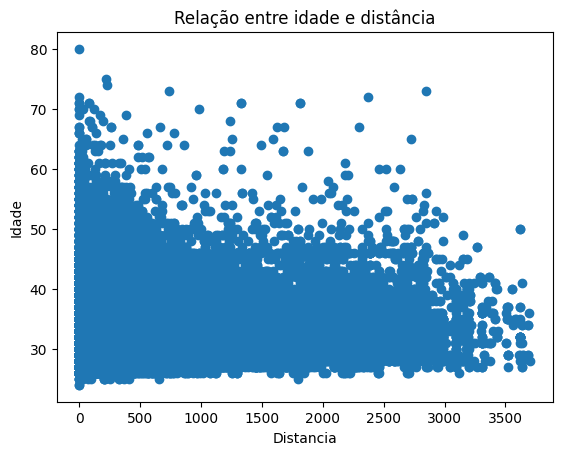

<Figure size 2000x1000 with 0 Axes>

In [7]:
plt.scatter(dist, dataset_aux['idade'], label=dataset_aux['idade'])
plt.xlabel('Distancia')
plt.ylabel('Idade')
plt.title('Relação entre idade e distância')
plt.figure(figsize=(20,10))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

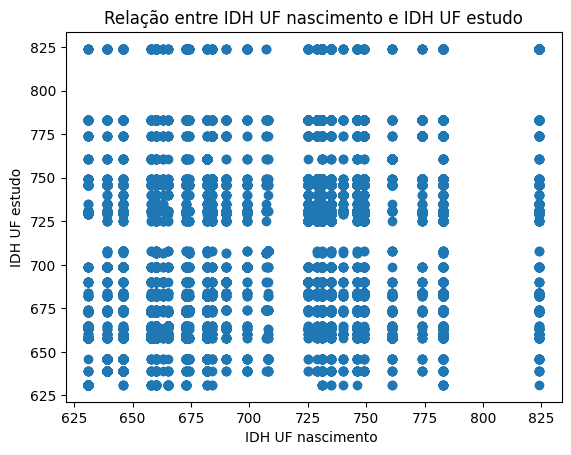

<Figure size 2000x1000 with 0 Axes>

In [8]:
plt.scatter(dataset_aux['idh_uf_nasc'], idh_uf_ies, label=dataset_aux['co_uf_nasc'])
plt.xlabel('IDH UF nascimento ')
plt.ylabel('IDH UF estudo')
plt.title('Relação entre IDH UF nascimento e IDH UF estudo')
plt.figure(figsize=(20,10))
plt.show